# R ML Crash Course_Part 6: Saving Model & Project Template (Regression)

## Full Day Workshop for user learn Data Science with R
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Make Predictions On New Data
- You can make new predictions using a model you have tuned using caret with the predict.train()
function. 
- In the recipe below, the dataset is split into a validation dataset and a training dataset.
The validation dataset could just as easily be a new dataset stored in a separate file and loaded
as a data frame. 
- A good model of the Pima Indians dataset is LDA. 
- We can see that caret
provides access to the best model from a training run in the finalModel variable.

In [2]:
# load packages
library(caret)
library(mlbench)
# load dataset
data(PimaIndiansDiabetes)
# create 80%/20% for training and validation datasets
set.seed(9)
validationIndex <- createDataPartition(PimaIndiansDiabetes$diabetes, p=0.80, list=FALSE)
validation <- PimaIndiansDiabetes[-validationIndex,]
training <- PimaIndiansDiabetes[validationIndex,]
# train a model and summarize model
set.seed(9)
trainControl <- trainControl(method="cv", number=10)
fit.lda <- train(diabetes~., data=training, method="lda", metric="Accuracy",
trControl=trainControl)
print(fit.lda)
print(fit.lda$finalModel)
# estimate skill on validation dataset
set.seed(9)
predictions <- predict(fit.lda, newdata=validation)
confusionMatrix(predictions, validation$diabetes)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:SparkR’:

    histogram

Loading required package: ggplot2

Attaching package: ‘caret’

The following object is masked from ‘package:httr’:

    progress

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select



Linear Discriminant Analysis 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 554, 554, 553, 554, 553, ... 
Resampling results:

  Accuracy   Kappa  
  0.7691169  0.45993

 
Call:
lda(x, grouping = y)

Prior probabilities of groups:
      neg       pos 
0.6504065 0.3495935 

Group means:
    pregnant  glucose pressure triceps  insulin     mass  pedigree     age
neg 3.395000 109.8550 67.94250 19.7525  70.0875 30.35475 0.4349175 31.3825
pos 4.832558 141.8977 69.54419 21.7907 100.3628 34.69070 0.5526837 36.2186

Coefficients of linear discriminants:
                   LD1
pregnant  0.1030170946
glucose   0.0312080648
pressure -0.0107811706
triceps   0.0008551633
insulin  -0.0011165058
mass      0.0478419713
pedigree  0.6337238528
age       0.0035088040


Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  85  19
       pos  15  34
                                          
               Accuracy : 0.7778          
                 95% CI : (0.7036, 0.8409)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.000586        
                                          
                  Kappa : 0.5004          
 Mcnemar's Test P-Value : 0.606905        
                                          
            Sensitivity : 0.8500          
            Specificity : 0.6415          
         Pos Pred Value : 0.8173          
         Neg Pred Value : 0.6939          
             Prevalence : 0.6536          
         Detection Rate : 0.5556          
   Detection Prevalence : 0.6797          
      Balanced Accuracy : 0.7458          
                                          
       'Positive' Class : neg             
                                          

- Running this example, we can see that the estimated accuracy on the training dataset was
76.91%. Using the finalModel in the fit, 
- we can see that the accuracy on the hold out validation
dataset was 77.78%, very similar to our estimate.

## Create A Standalone Model
- we have tuned a Random Forest with three different values for mtry and ntree
set to 2,000. 
- By printing the fit and the finalModel, we can see that the most accurate value for
mtry was 2. 
- Now that we know a good algorithm (Random Forest) and the good configuration
(mtry=2, ntree=2000) 
- we can create the final model directly using all of the training data.

In [4]:
# load packages
library(caret)
library(mlbench)
library(randomForest)
# load dataset
data(Sonar)
set.seed(7)
# create 80%/20% for training and validation datasets
validationIndex <- createDataPartition(Sonar$Class, p=0.80, list=FALSE)
validation <- Sonar[-validationIndex,]
training <- Sonar[validationIndex,]
# train a model and summarize model
set.seed(7)
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
fit.rf <- train(Class~., data=training, method="rf", metric="Accuracy",
trControl=trainControl, ntree=2000)
print(fit.rf)
print(fit.rf$finalModel)
# create standalone model using all training data
set.seed(7)
finalModel <- randomForest(Class~., training, mtry=2, ntree=2000)
# make a predictions on "new data" using the final model
finalPredictions <- predict(finalModel, validation[,1:60])
confusionMatrix(finalPredictions, validation$Class)

Random Forest 

167 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 151, 150, 150, 150, 151, 150, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8546569  0.7046029
  31    0.8066176  0.6090657
  60    0.7946078  0.5850994

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 

Call:
 randomForest(x = x, y = y, ntree = 2000, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 2000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.17%
Confusion matrix:
   M  R class.error
M 81  8  0.08988764
R 19 59  0.24358974


Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 20  5
         R  2 14
                                          
               Accuracy : 0.8293          
                 95% CI : (0.6794, 0.9285)
    No Information Rate : 0.5366          
    P-Value [Acc > NIR] : 8.511e-05       
                                          
                  Kappa : 0.653           
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9091          
            Specificity : 0.7368          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5366          
         Detection Rate : 0.4878          
   Detection Prevalence : 0.6098          
      Balanced Accuracy : 0.8230          
                                          
       'Positive' Class : M               
                                          

- We can see that the estimated accuracy of the optimal conguration was 85.07%. 
- We can
also see that the accuracy of the final standalone model trained on all of the training dataset
and 
- predicting for the validation dataset was 82.93%,

## Hardcode for simple algorithm with cofficient
- Some simpler models, like linear models can output their coeffcients. 
- This is useful, because
from these, you can implement the simple prediction procedure in your programming language
of choice and use the coeffcients to get the same accuracy.
- This gets more difficult as the
complexity of the representation used by the algorithm increases.

# Save and Load Your Model

- You can save your best models to a file so that you can load them up later and make predictions.
-  We take our validation dataset as new data to test our final model. We train the final model using
the training dataset and our optimal parameters, 
- then save it to a file called finalModel.rds in the local working directory.
- The model is serialized. It can be loaded at a later time by calling the readRDS() function
and assigning the object that is loaded (in this case a Random Forest fit) to a variable name.
- The loaded Random Forest is then used to make predictions on new data, in this case the
validation dataset

In [5]:
# load packages
library(caret)
library(mlbench)
library(randomForest)
# load dataset
data(Sonar)
set.seed(7)
# create 80%/20% for training and validation datasets
validationIndex <- createDataPartition(Sonar$Class, p=0.80, list=FALSE)
validation <- Sonar[-validationIndex,]
training <- Sonar[validationIndex,]
# create final standalone model using all training data
set.seed(7)
finalModel <- randomForest(Class~., training, mtry=2, ntree=2000)
# save the model to disk
saveRDS(finalModel, "./finalModel.rds")

### Later...

In [6]:
# load the model
superModel <- readRDS("./finalModel.rds")
print(superModel)
# make a predictions on "new data" using the final model
finalPredictions <- predict(superModel, validation[,1:60])
confusionMatrix(finalPredictions, validation$Class)


Call:
 randomForest(formula = Class ~ ., data = training, mtry = 2,      ntree = 2000) 
               Type of random forest: classification
                     Number of trees: 2000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 13.77%
Confusion matrix:
   M  R class.error
M 83  6  0.06741573
R 17 61  0.21794872


Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 20  5
         R  2 14
                                          
               Accuracy : 0.8293          
                 95% CI : (0.6794, 0.9285)
    No Information Rate : 0.5366          
    P-Value [Acc > NIR] : 8.511e-05       
                                          
                  Kappa : 0.653           
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9091          
            Specificity : 0.7368          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5366          
         Detection Rate : 0.4878          
   Detection Prevalence : 0.6098          
      Balanced Accuracy : 0.8230          
                                          
       'Positive' Class : M               
                                          

#### We can see that the accuracy on the validation dataset was 82.93%.


# Project Template

In [9]:
# R Project Template

# 1. Prepare Problem
# a) Load packages
# b) Load dataset
# c) Split-out validation dataset

# 2. Summarize Data (EDA)
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Test options and evaluation metric
# b) Spot-Check Algorithms
# c) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Regression: Boston Housing Price
The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

The attributes are dened as
follows (taken from the UCI Machine Learning Repository):

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0:63)2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

In [1]:
# load packages
library(mlbench)
library(caret)
library(corrplot)
# attach the BostonHousing dataset
data(BostonHousing)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:SparkR’:

    histogram

Loading required package: ggplot2

Attaching package: ‘caret’

The following object is masked from ‘package:httr’:

    progress

corrplot 0.84 loaded


In [3]:
head(BostonHousing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [10]:
# Split out validation dataset
# create a list of 80% of the rows in the original dataset we can use for training
set.seed(7)
validationIndex <- createDataPartition(BostonHousing$medv, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- BostonHousing[-validationIndex,]
# use the remaining 80% of data to training and testing the models
dataset <- BostonHousing[validationIndex,]

In [11]:
dim(validation)
dim(dataset)

[1] 99 14

[1] 407  14

In [16]:
sapply(dataset, class)

# https://www.r-bloggers.com/using-apply-sapply-lapply-in-r/

crim        zn     indus      chas       nox        rm       age       dis 
"numeric" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" "numeric" 
      rad       tax   ptratio         b     lstat      medv 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

In [17]:
# if wanna change the data type from factor to numeric
# breast$class <- as.numeric(as.character(breast$class))

# if want to change multiple columnt to class
# indx <- sapply(breast, is.factor)
# breast[indx] <- lapply(breast[indx], function(x) as.numeric(as.character(x)))

summary(dataset)

      crim                zn            indus       chas         nox        
 Min.   : 0.00906   Min.   : 0.00   Min.   : 0.46   0:376   Min.   :0.3850  
 1st Qu.: 0.08556   1st Qu.: 0.00   1st Qu.: 5.19   1: 31   1st Qu.:0.4530  
 Median : 0.28955   Median : 0.00   Median : 9.90           Median :0.5380  
 Mean   : 3.58281   Mean   :10.57   Mean   :11.36           Mean   :0.5577  
 3rd Qu.: 3.50464   3rd Qu.: 0.00   3rd Qu.:18.10           3rd Qu.:0.6310  
 Max.   :88.97620   Max.   :95.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.863   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.873   1st Qu.: 45.05   1st Qu.: 2.031   1st Qu.: 4.000  
 Median :6.185   Median : 77.70   Median : 3.216   Median : 5.000  
 Mean   :6.279   Mean   : 68.83   Mean   : 3.731   Mean   : 9.464  
 3rd Qu.:6.611   3rd Qu.: 94.55   3rd Qu.: 5.100   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :10.710   Ma

In [18]:
dataset[,4] <- as.numeric(as.character(dataset[,4]))

In [22]:
cor(dataset[,1:13])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.00000000,-0.19790631,0.40597009,-0.05713065,0.4232413,-0.21513269,0.3543819,-0.3905097,0.64240501,0.60622608,0.2892983,-0.3021185,0.47537617
zn,-0.19790631,1.00000000,-0.51895069,-0.04843477,-0.5058512,0.28942883,-0.5707027,0.6561874,-0.29952976,-0.28791668,-0.3534121,0.1692749,-0.39712686
indus,0.40597009,-0.51895069,1.00000000,0.08003629,0.7665481,-0.37673408,0.6585831,-0.7230588,0.56774365,0.68070916,0.3292061,-0.3359795,0.59212718
chas,-0.05713065,-0.04843477,0.08003629,1.00000000,0.1027366,0.08252441,0.1093812,-0.1114242,-0.00901245,-0.02779018,-0.1355438,0.0472442,-0.04569239
nox,0.42324132,-0.50585121,0.76654811,0.10273656,1.0000000,-0.29885055,0.7238371,-0.7708680,0.58516760,0.65217875,0.1416616,-0.3620791,0.58196447
rm,-0.21513269,0.28942883,-0.37673408,0.08252441,-0.2988506,1.00000000,-0.2325359,0.1952159,-0.19149122,-0.26794733,-0.3200037,0.1553992,-0.62038075
age,0.35438190,-0.57070265,0.65858310,0.10938121,0.7238371,-0.23253586,1.0000000,-0.7503321,0.45235421,0.50164657,0.2564318,-0.2512574,0.59321281
dis,-0.39050970,0.65618742,-0.72305885,-0.11142420,-0.7708680,0.19521590,-0.7503321,1.0000000,-0.49382744,-0.52649325,-0.2021897,0.2826819,-0.49573024
rad,0.64240501,-0.29952976,0.56774365,-0.00901245,0.5851676,-0.19149122,0.4523542,-0.4938274,1.00000000,0.92137876,0.4531232,-0.4103307,0.47306604
tax,0.60622608,-0.28791668,0.68070916,-0.02779018,0.6521787,-0.26794733,0.5016466,-0.5264932,0.92137876,1.00000000,0.4419243,-0.4184878,0.52339243


In [24]:
install.packages('PerformanceAnalytics')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)
also installing the dependency ‘xts’



## Unimodal Data Visualizations
Let's look at visualizations of individual attributes. It is often useful to look at your data
using multiple dierent visualizations in order to spark ideas.

Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a graphical parameter”Warning message in plot.window(...):
“"method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”Warning message in title(...):
“"method" is not a 

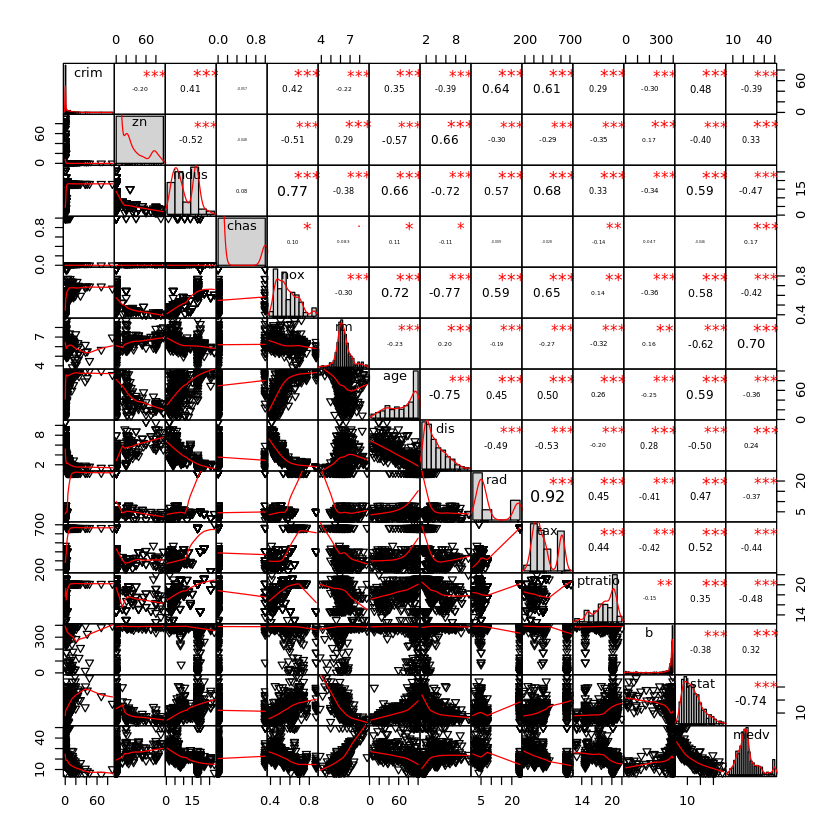

In [28]:
library("PerformanceAnalytics")
my_data <- mtcars[, c(1,2,3,4,5,6,7,8)]
chart.Correlation(dataset, histogram=TRUE, pch=25)

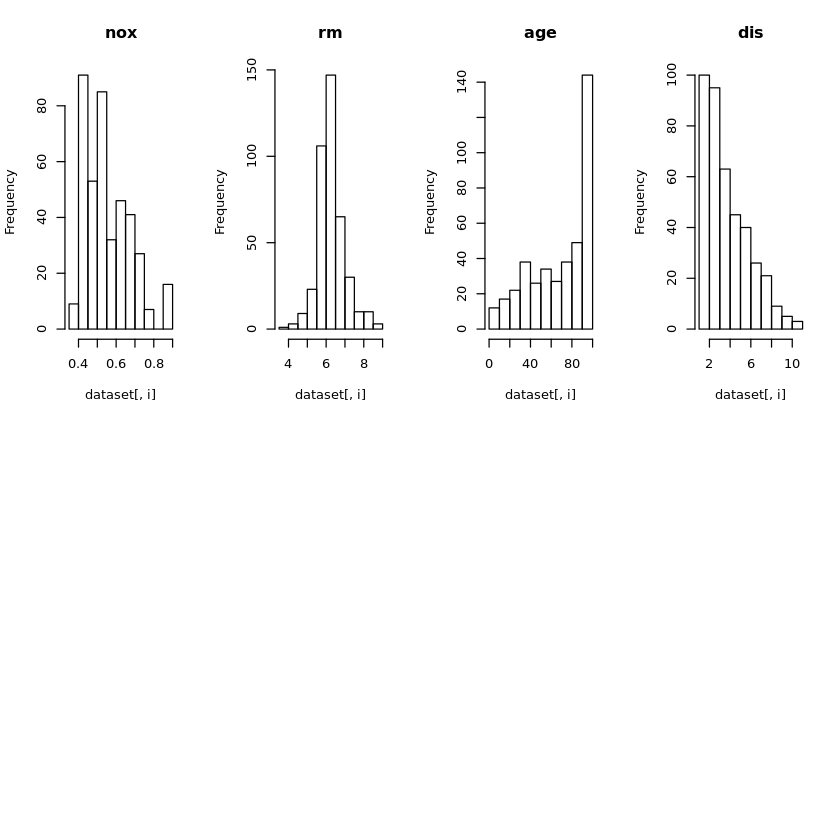

In [40]:
par(mfrow=c(2,4 ))
for(i in 5:8) {
hist(dataset[,i], main=names(dataset)[i])
}

In [ ]:
par(mfrow=c(2,4))
for (i =1:4) {
    plot(density(dataset[,i]), main=names(dataset)[i])
}

- This perhaps adds more evidence to our suspicion about possible exponential and bimodal
distributions. 
- It also looks like nox, rm and lstat may be skewed Gaussian distributions, which
might be helpful later with transforms.

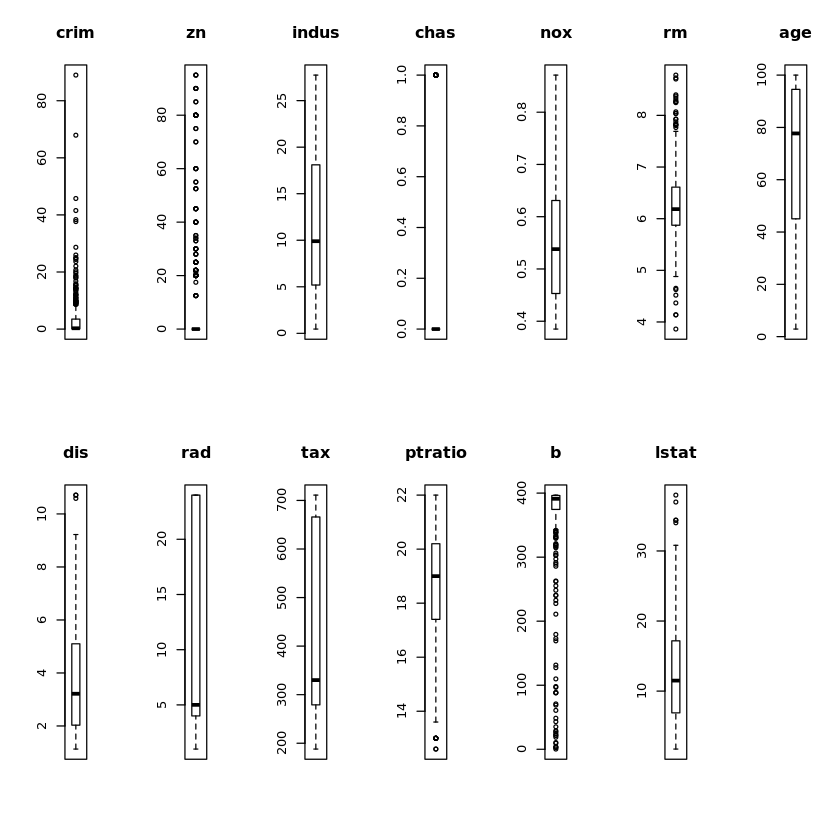

In [41]:
# boxplots for each attribute
par(mfrow=c(2,7))
for(i in 1:13) {
boxplot(dataset[,i], main=names(dataset)[i])
}

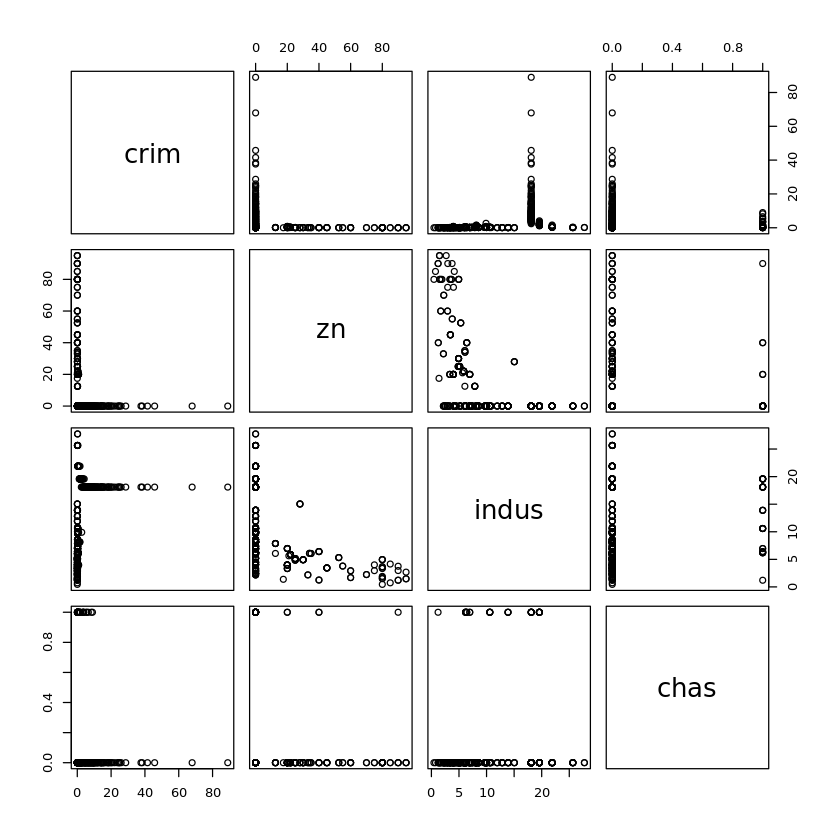

In [44]:
pairs(dataset[,1:4])

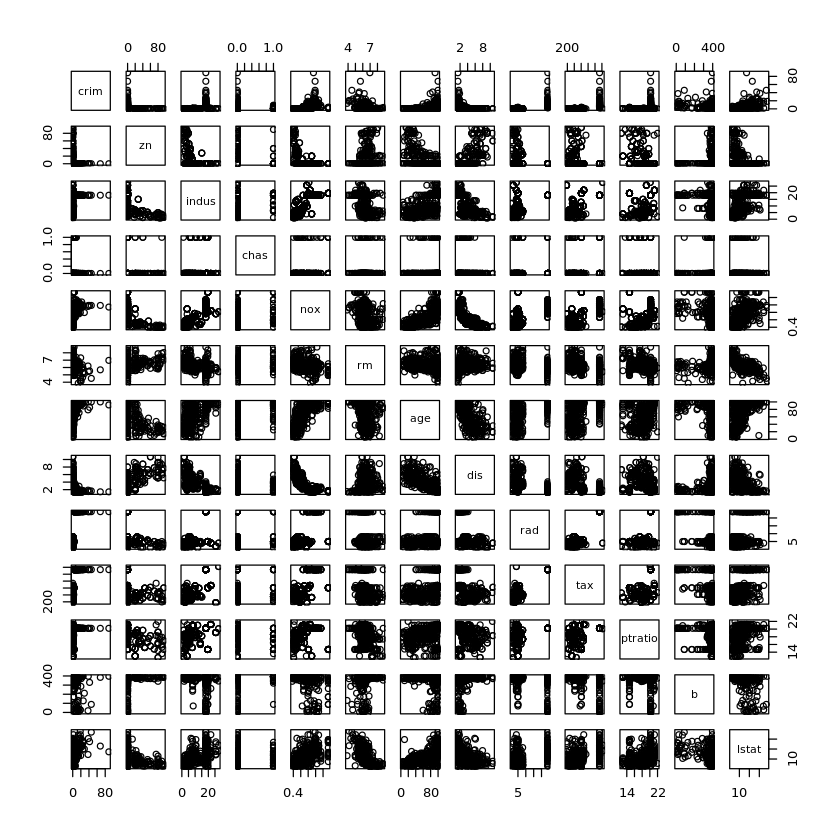

In [42]:
# scatter plot matrix
pairs(dataset[,1:13])

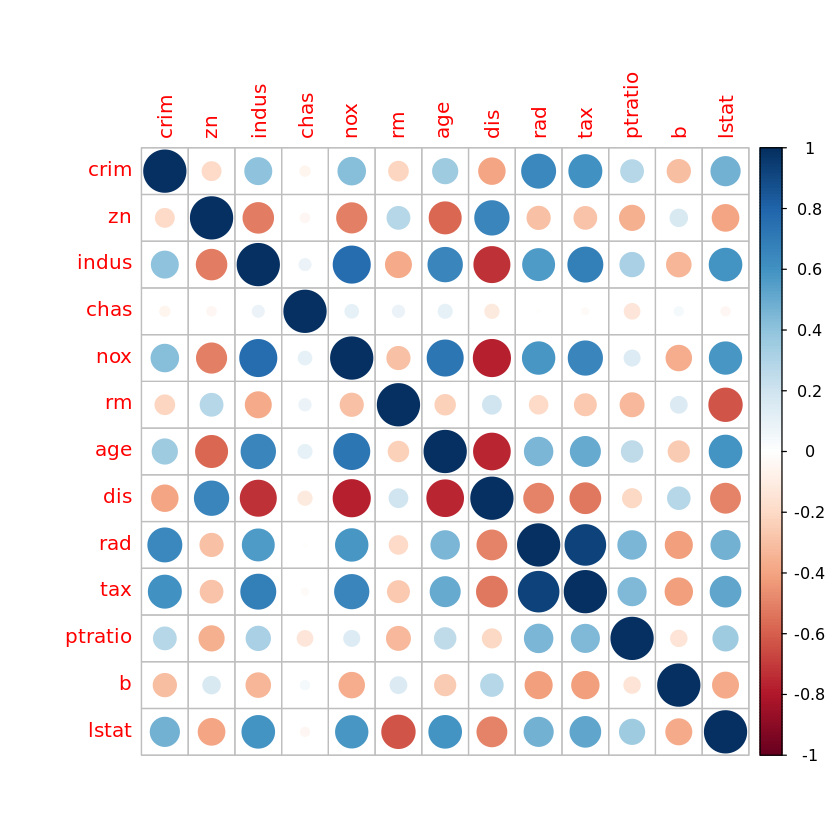

In [45]:
# correlation plot
correlations <- cor(dataset[,1:13])
corrplot(correlations, method="circle")

## Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it
would be worth trying:

- Feature selection and removing the most correlated attributes.

- Normalizing the dataset to reduce the eect of diering scales.

- Standardizing the dataset to reduce the eects of diering distributions.

- Box-Cox transform to see if attening out some of the distributions improves accuracy.

With lots of additional time I would also explore the possibility of binning (discretization)
of the data. This can often improve accuracy for decision tree algorithms.

#### For more details on normalizing, try to get reference from the Python ML Course.

## Baseline

- We have no idea what algorithms will do well on this problem. 
- Let's design our test harness. 
- We will use 10-fold
cross-validation (each fold will be about 360 instances for training and 40 for test) with 3 repeats.
- The dataset is not too small and this is a good standard test harness conguration.

## Algorithm Set Up
- We know the data has differing units of measure 
- so we will standardize the data for this
baseline comparison.
- The algorithms all use default tuning parameters, except CART which is fussy on this
dataset and has 3 default parameters specied.

In [46]:
# Run algorithms using 10-fold cross-validation
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"

In [47]:
# LM
set.seed(7)
fit.lm <- train(medv~., data=dataset, method="lm", metric=metric, preProc=c("center",
"scale"), trControl=trainControl)

# GLM
set.seed(7)
fit.glm <- train(medv~., data=dataset, method="glm", metric=metric, preProc=c("center",
"scale"), trControl=trainControl)

# GLMNET
set.seed(7)
fit.glmnet <- train(medv~., data=dataset, method="glmnet", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)

# SVM
set.seed(7)
fit.svm <- train(medv~., data=dataset, method="svmRadial", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)

# CART
set.seed(7)
grid <- expand.grid(.cp=c(0, 0.05, 0.1))
fit.cart <- train(medv~., data=dataset, method="rpart", metric=metric, tuneGrid=grid,
preProc=c("center", "scale"), trControl=trainControl)

# KNN
set.seed(7)
fit.knn <- train(medv~., data=dataset, method="knn", metric=metric, preProc=c("center",
"scale"), trControl=trainControl)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach

Attaching package: ‘foreach’

The following object is masked from ‘package:SparkR’:

    when

Loaded glmnet 2.0-13

Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

The following object is masked from ‘package:SparkR’:

    size

Loading required package: rpart



Call:
summary.resamples(object = results)

Models: LM, GLM, GLMNET, SVM, CART, KNN 
Number of resamples: 30 

RMSE 
        Min. 1st Qu. Median  Mean 3rd Qu.  Max. NA's
LM     3.514   4.056  4.773 4.963   5.529 9.448    0
GLM    3.514   4.056  4.773 4.963   5.529 9.448    0
GLMNET 3.484   4.017  4.767 4.955   5.520 9.506    0
SVM    2.377   3.010  3.750 3.952   4.463 8.177    0
CART   2.797   3.434  4.272 4.541   5.437 9.248    0
KNN    2.394   3.509  4.471 4.555   5.089 8.757    0

Rsquared 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LM     0.3169  0.6682 0.7428 0.7293  0.7984 0.8882    0
GLM    0.3169  0.6682 0.7428 0.7293  0.7984 0.8882    0
GLMNET 0.3092  0.6670 0.7437 0.7296  0.7989 0.8921    0
SVM    0.5229  0.7803 0.8513 0.8290  0.8820 0.9418    0
CART   0.3614  0.6733 0.8197 0.7680  0.8613 0.9026    0
KNN    0.4313  0.7168 0.8024 0.7732  0.8588 0.9146    0


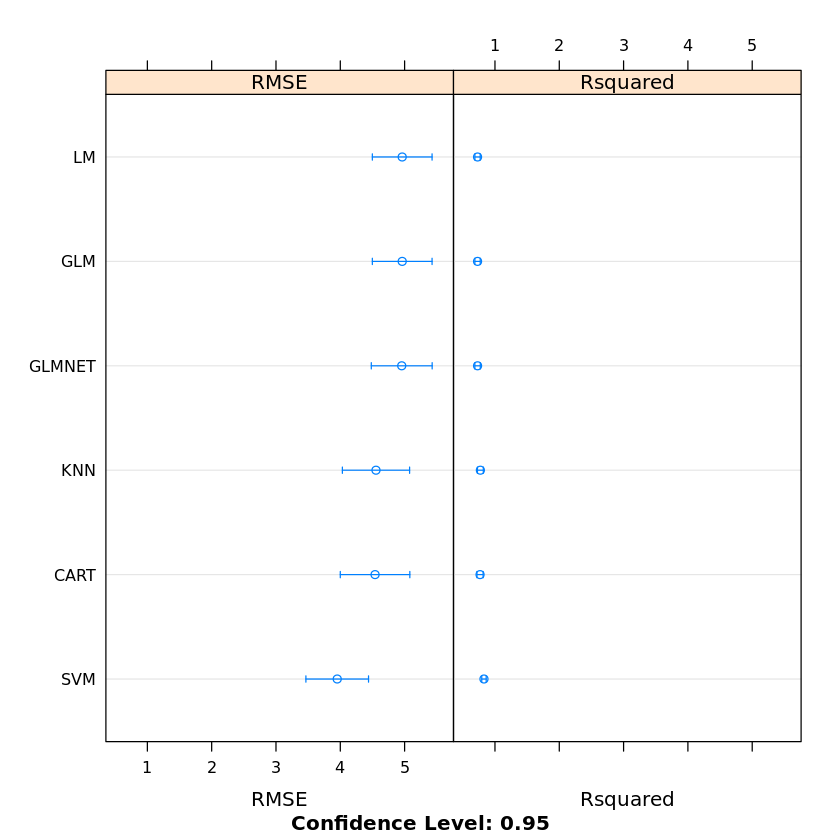

In [48]:
# Compare algorithms
results <- resamples(list(LM=fit.lm, GLM=fit.glm, GLMNET=fit.glmnet, SVM=fit.svm,
CART=fit.cart, KNN=fit.knn))
summary(results)
dotplot(results)


### Observation
- It looks like SVM has the lowest RMSE, followed closely by the other nonlinear algorithms
CART and KNN. 
- The linear regression algorithms all appear to be in the same ball park and
exhibit slightly worse error.
- We can also see that SVM and the other nonlinear algorithms have the best t for the data
in their R2 measures.

# Evaluate Algorithms: Feature Selection
- We have a theory that the correlated attributes are reducing the accuracy of the linear algorithms
tried in the baseline spot-check in the last step. 
- In this step we will remove the highly correlated
attributes and see what eect that has on the evaluation metrics. 
- We can find and remove the
highly correlated attributes using the findCorrelation() function 
- from the caret package as
follows:

In [49]:
# remove correlated attributes
# find attributes that are highly correlated
set.seed(7)
cutoff <- 0.70
correlations <- cor(dataset[,1:13])
highlyCorrelated <- findCorrelation(correlations, cutoff=cutoff)
for (value in highlyCorrelated) {
print(names(dataset)[value])
}

# create a new dataset without highly correlated features
datasetFeatures <- dataset[,-highlyCorrelated]
dim(datasetFeatures)

[1] "indus"
[1] "nox"
[1] "tax"
[1] "dis"


[1] 407  10

#### We can see that we have dropped 4 attributes: indus, nox, tax and dis.


Call:
summary.resamples(object = feature_results)

Models: LM, GLM, GLMNET, SVM, CART, KNN 
Number of resamples: 30 

RMSE 
        Min. 1st Qu. Median  Mean 3rd Qu.  Max. NA's
LM     3.431   4.439  4.908 5.277   5.998 9.982    0
GLM    3.431   4.439  4.908 5.277   5.998 9.982    0
GLMNET 3.283   4.330  4.950 5.236   5.895 9.869    0
SVM    2.726   3.337  4.100 4.352   5.036 8.503    0
CART   2.661   3.550  4.462 4.618   5.246 9.558    0
KNN    2.488   3.377  4.467 4.453   5.051 8.889    0

Rsquared 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LM     0.2505  0.6271 0.7125 0.6955  0.7797 0.8877    0
GLM    0.2505  0.6271 0.7125 0.6955  0.7797 0.8877    0
GLMNET 0.2581  0.6274 0.7174 0.7027  0.7783 0.8905    0
SVM    0.4866  0.7522 0.8185 0.7883  0.8673 0.9168    0
CART   0.3310  0.7067 0.7987 0.7607  0.8363 0.9360    0
KNN    0.4105  0.7147 0.7981 0.7759  0.8648 0.9117    0


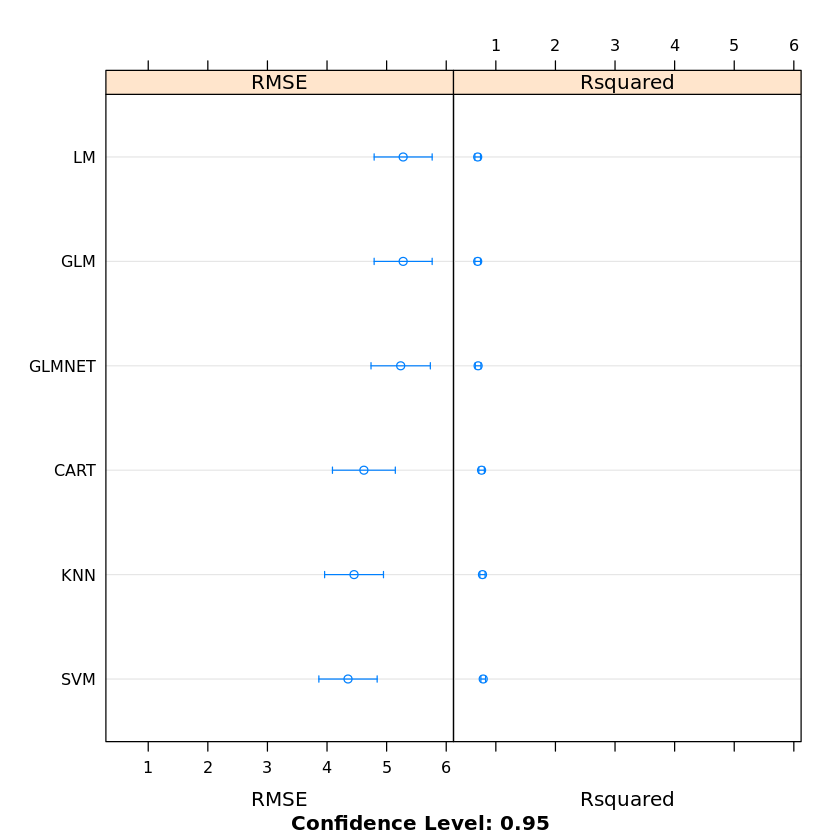

In [50]:
# Run algorithms using 10-fold cross-validation
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"
# lm
set.seed(7)
fit.lm <- train(medv~., data=datasetFeatures, method="lm", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)
# GLM
set.seed(7)
fit.glm <- train(medv~., data=datasetFeatures, method="glm", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)
# GLMNET
set.seed(7)
fit.glmnet <- train(medv~., data=datasetFeatures, method="glmnet", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)
# SVM
set.seed(7)
fit.svm <- train(medv~., data=datasetFeatures, method="svmRadial", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)
# CART
set.seed(7)
grid <- expand.grid(.cp=c(0, 0.05, 0.1))
fit.cart <- train(medv~., data=datasetFeatures, method="rpart", metric=metric,
tuneGrid=grid, preProc=c("center", "scale"), trControl=trainControl)
# KNN
set.seed(7)
fit.knn <- train(medv~., data=datasetFeatures, method="knn", metric=metric,
preProc=c("center", "scale"), trControl=trainControl)


# Compare algorithms
feature_results <- resamples(list(LM=fit.lm, GLM=fit.glm, GLMNET=fit.glmnet, SVM=fit.svm,
CART=fit.cart, KNN=fit.knn))
summary(feature_results)
dotplot(feature_results)

#### Comparing the results, we can see that this has made the RMSE worse for the linear and the nonlinear algorithms.

# Evaluate Algorithms: Box-Cox Transform
- We know that some of the attributes have a skew and others perhaps have an exponential
distribution. 
- One option would be to explore squaring and log transforms respectively (you
could try this!). 
- Another approach would be to use a power transform and let it figure out the
amount to correct each attribute. 
- One example is the Box-Cox power transform. Let's try using
this transform to rescale the original data and evaluate the effect on the same 6 algorithms. 
- We
will also leave in the centering and scaling for the benefit of the instance-based methods.


Call:
summary.resamples(object = transformResults)

Models: LM, GLM, GLMNET, SVM, CART, KNN 
Number of resamples: 30 

RMSE 
        Min. 1st Qu. Median  Mean 3rd Qu.  Max. NA's
LM     3.404   3.811  4.399 4.621   5.167 7.781    0
GLM    3.404   3.811  4.399 4.621   5.167 7.781    0
GLMNET 3.312   3.802  4.429 4.611   5.123 7.976    0
SVM    2.336   2.937  3.543 3.761   4.216 8.207    0
CART   2.797   3.434  4.272 4.541   5.437 9.248    0
KNN    2.474   3.608  4.308 4.563   5.080 8.922    0

Rsquared 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LM     0.5439  0.7177 0.7832 0.7627  0.8257 0.8861    0
GLM    0.5439  0.7177 0.7832 0.7627  0.8257 0.8861    0
GLMNET 0.5198  0.7172 0.7808 0.7634  0.8297 0.8909    0
SVM    0.5082  0.8249 0.8760 0.8452  0.8998 0.9450    0
CART   0.3614  0.6733 0.8197 0.7680  0.8613 0.9026    0
KNN    0.4065  0.7562 0.8073 0.7790  0.8594 0.9043    0


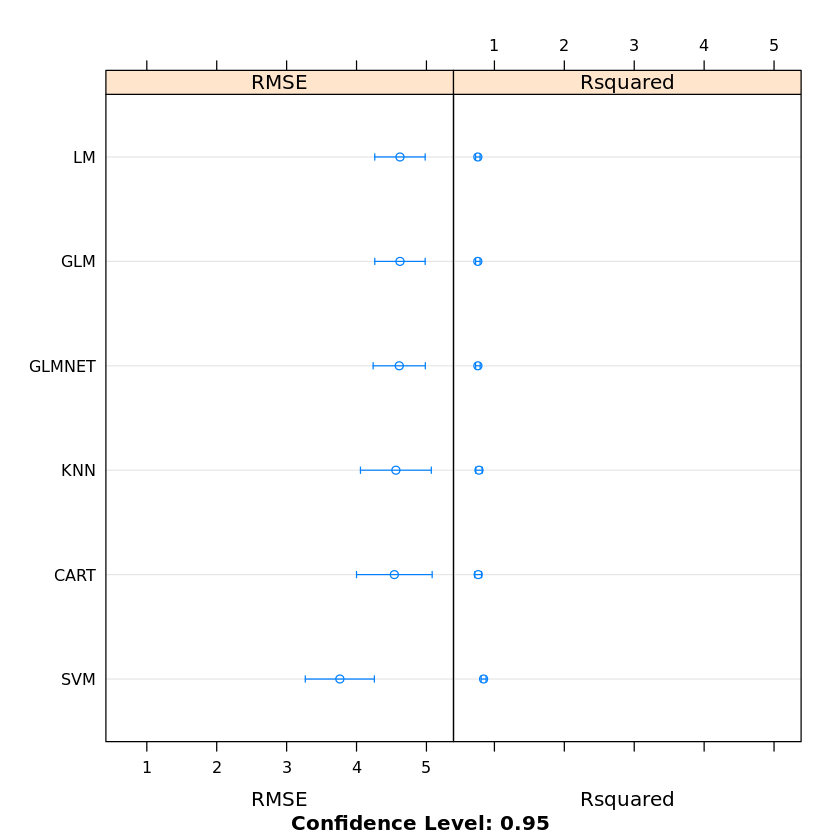

In [51]:
# Run algorithms using 10-fold cross-validation
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"
# lm
set.seed(7)
fit.lm <- train(medv~., data=dataset, method="lm", metric=metric, preProc=c("center",
"scale", "BoxCox"), trControl=trainControl)
# GLM
set.seed(7)
fit.glm <- train(medv~., data=dataset, method="glm", metric=metric, preProc=c("center",
"scale", "BoxCox"), trControl=trainControl)
# GLMNET
set.seed(7)
fit.glmnet <- train(medv~., data=dataset, method="glmnet", metric=metric,
preProc=c("center", "scale", "BoxCox"), trControl=trainControl)
# SVM
set.seed(7)
fit.svm <- train(medv~., data=dataset, method="svmRadial", metric=metric,
preProc=c("center", "scale", "BoxCox"), trControl=trainControl)
# CART
set.seed(7)
grid <- expand.grid(.cp=c(0, 0.05, 0.1))
fit.cart <- train(medv~., data=dataset, method="rpart", metric=metric, tuneGrid=grid,
preProc=c("center", "scale", "BoxCox"), trControl=trainControl)
# KNN
set.seed(7)
fit.knn <- train(medv~., data=dataset, method="knn", metric=metric, preProc=c("center",
"scale", "BoxCox"), trControl=trainControl)


# Compare algorithms
transformResults <- resamples(list(LM=fit.lm, GLM=fit.glm, GLMNET=fit.glmnet, SVM=fit.svm,
CART=fit.cart, KNN=fit.knn))
summary(transformResults)
dotplot(transformResults)

#### We can see that this decreased the RMSE and increased the R2 on all except the CART algorithms. The RMSE of SVM dropped to an average of 3.761.

# Improve Results With Tuning
- We can improve the accuracy of the well performing algorithms by tuning their parameters. 
- In
this section we will look at tuning the parameters of SVM with a Radial Basis Function (RBF).
- with more time it might be worth exploring tuning of the parameters for CART and KNN.
- It might also be worth exploring other kernels for SVM besides the RBF. Let's look at the default
parameters already adopted.

In [54]:
print(fit.svm)

Support Vector Machines with Radial Basis Function Kernel 

407 samples
 13 predictor

Pre-processing: centered (13), scaled (13), Box-Cox transformation (11) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 366, 367, 366, 366, 367, 367, ... 
Resampling results across tuning parameters:

  C     RMSE      Rsquared 
  0.25  4.555338  0.7906921
  0.50  4.111564  0.8204520
  1.00  3.761245  0.8451964

Tuning parameter 'sigma' was held constant at a value of 0.07491936
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were sigma = 0.07491936 and C = 1. 


#### The C parameter is the cost constraint used by SVM. Learn more in the help for the ksvm function.
#### We can see from previous results that a C value of 1.0 is a good starting point.

In [55]:
print(fit.cart)

CART 

407 samples
 13 predictor

Pre-processing: centered (13), scaled (13), Box-Cox transformation (11) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 366, 367, 366, 366, 367, 367, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared 
  0.00  4.540888  0.7680166
  0.05  5.783494  0.6268224
  0.10  6.074626  0.5864970

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0. 


- Let's design a grid search around a C value of 1. 
- We might see a small trend of decreasing
RMSE with increasing C, 
- so let's try all integer C values between 1 and 10. Another parameter
that caret let's us tune is the sigma parameter. 
- This is a smoothing parameter. Good sigma
values often start around 0.1, so we will try numbers before and after.

Support Vector Machines with Radial Basis Function Kernel 

407 samples
 13 predictor

Pre-processing: Box-Cox transformation (11) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 366, 367, 366, 366, 367, 367, ... 
Resampling results across tuning parameters:

  sigma  C   RMSE      Rsquared 
  0.025   1  3.889703  0.8335201
  0.025   2  3.685009  0.8470869
  0.025   3  3.562851  0.8553298
  0.025   4  3.453041  0.8628558
  0.025   5  3.372501  0.8686287
  0.025   6  3.306693  0.8731149
  0.025   7  3.261471  0.8761873
  0.025   8  3.232191  0.8780827
  0.025   9  3.208426  0.8797434
  0.025  10  3.186740  0.8812147
  0.050   1  3.771428  0.8438368
  0.050   2  3.484116  0.8634056
  0.050   3  3.282230  0.8768963
  0.050   4  3.179856  0.8829293
  0.050   5  3.105290  0.8873315
  0.050   6  3.054516  0.8907211
  0.050   7  3.024010  0.8925927
  0.050   8  3.003371  0.8936101
  0.050   9  2.984457  0.8944677
  0.050  10  2.977085  0.8948000
  0.100   1 

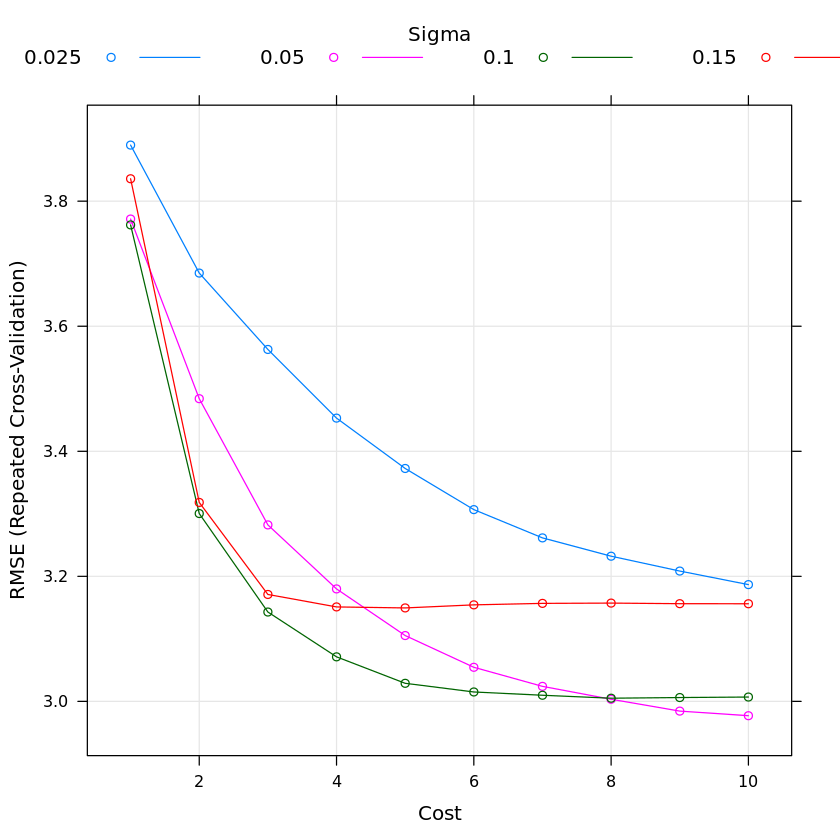

In [56]:
# tune SVM sigma and C parametres
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"
set.seed(7)
grid <- expand.grid(.sigma=c(0.025, 0.05, 0.1, 0.15), .C=seq(1, 10, by=1))
fit.svm <- train(medv~., data=dataset, method="svmRadial", metric=metric, tuneGrid=grid,
preProc=c("BoxCox"), trControl=trainControl)
print(fit.svm)
plot(fit.svm)

- We can see that the sigma values 
atten out with larger C cost constraints. 
- It looks like
we might do well with a sigma of 0.05 and a C of 10. 
- This gives us a respectable RMSE of
2.977085.

### KSVM Tunning referencex
#### http://blog.revolutionanalytics.com/2015/10/the-5th-tribe-support-vector-machines-and-caret.html

# Ensemble Methods
- We can try some ensemble methods on the problem and see if we can get a further decrease in
our RMSE. 
- In this section we will look at some boosting and bagging techniques for decision
trees.

** Random Forest, bagging (RF)**


** Gradient Boosting Machines (GBM) **


** Cubist, boosting (CUBIST) **

In [61]:
install.packages('gbm')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)


In [ ]:
# try ensembles
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"
# Random Forest
set.seed(7)
fit.rf <- train(medv~., data=dataset, method="rf", metric=metric, preProc=c("BoxCox"),
trControl=trainControl)
# Stochastic Gradient Boosting
set.seed(7)
fit.gbm <- train(medv~., data=dataset, method="gbm", metric=metric, preProc=c("BoxCox"),
trControl=trainControl, verbose=FALSE)
# Cubist
set.seed(7)
fit.cubist <- train(medv~., data=dataset, method="cubist", metric=metric,
preProc=c("BoxCox"), trControl=trainControl)
# Compare algorithms
ensembleResults <- resamples(list(RF=fit.rf, GBM=fit.gbm, CUBIST=fit.cubist))
summary(ensembleResults)
dotplot(ensembleResults)

- Let's dive deeper into Cubist and see if we can tune it further and get more skill out of
it. Cubist has two parameters that are tunable with caret:

$$committees$$ 

- which is the number
of boosting operations and 


$$neighbors$$ 




- which is used during prediction and is the number of
instances used to correct the rule-based prediction (although the documentation is perhaps
a little ambiguous on this).

In [ ]:
# look at parameters used for Cubist
print(fit.cubist)

#### Let's use a grid search to tune around those values. We'll try all committees between 15 and 25 and spot-check a neighbors value above and below 5.

In [ ]:
# Tune the Cubist algorithm
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "RMSE"
set.seed(7)
grid <- expand.grid(.committees=seq(15, 25, by=1), .neighbors=c(3, 5, 7))
tune.cubist <- train(medv~., data=dataset, method="cubist", metric=metric,
preProc=c("BoxCox"), tuneGrid=grid, trControl=trainControl)
print(tune.cubist)
plot(tune.cubist)

#### We can see that we have achieved a more accurate model again with an RMSE of 2.822  using committees = 18 and neighbors = 3.

# Finalize Model
- It looks like the results for the Cubist algorithm are the most accurate. 
- Let's finalize it by
creating a new standalone Cubist model with the parameters above trained
- using the whole
dataset. We must also use the Box-Cox power transform.

In [ ]:
# prepare the data transform using training data
set.seed(7)
x <- dataset[,1:13]
y <- dataset[,14]
preprocessParams <- preProcess(x, method=c("BoxCox"))
transX <- predict(preprocessParams, x)
# train the final model
finalModel <- cubist(x=transX, y=y, committees=18)
summary(finalModel)

#### We can now use this model to evaluate our held-out validation dataset. Again, we must prepare the input data using the same Box-Cox transform.

In [ ]:
# transform the validation dataset
set.seed(7)
valX <- validation[,1:13]
trans_valX <- predict(preprocessParams, valX)
valY <- validation[,14]
# use final model to make predictions on the validation dataset
predictions <- predict(finalModel, newdata=trans_valX, neighbors=3)
# calculate RMSE
rmse <- RMSE(predictions, valY)
r2 <- R2(predictions, valY)
print(rmse)